In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import cluster, datasets
from matplotlib.lines import Line2D
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from sklearn.cluster import KMeans
from random import randint
from time import sleep
from pandas import json_normalize
from sklearn.metrics import silhouette_score
import webbrowser

In [2]:
df= pd.read_csv('spotify_playlist1.csv')
df2= pd.read_csv('hot_songs.csv')

In [3]:
df.head(60)

,song_name,name,song_id,popularity,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,its different now,Futuristic,6H5TYO99H0twhaMrtAHjoK,41,0.618,0.588,1,-10.818,0,0.4430,...,0.2260,0.4870,172.253,audio_features,6H5TYO99H0twhaMrtAHjoK,spotify:track:6H5TYO99H0twhaMrtAHjoK,https://api.spotify.com/v1/tracks/6H5TYO99H0tw...,https://api.spotify.com/v1/audio-analysis/6H5T...,202326,4
1,its different now,Phora,6H5TYO99H0twhaMrtAHjoK,41,0.618,0.588,1,-10.818,0,0.4430,...,0.2260,0.4870,172.253,audio_features,6H5TYO99H0twhaMrtAHjoK,spotify:track:6H5TYO99H0twhaMrtAHjoK,https://api.spotify.com/v1/tracks/6H5TYO99H0tw...,https://api.spotify.com/v1/audio-analysis/6H5T...,202326,4
2,Parted Ways,Arizona Zervas,3Sx8k6SH4gqMMjS7nqLcJR,46,0.854,0.324,2,-7.634,1,0.0741,...,0.0876,0.0734,132.963,audio_features,3Sx8k6SH4gqMMjS7nqLcJR,spotify:track:3Sx8k6SH4gqMMjS7nqLcJR,https://api.spotify.com/v1/tracks/3Sx8k6SH4gqM...,https://api.spotify.com/v1/audio-analysis/3Sx8...,205714,4
3,Parted Ways,Arye,3Sx8k6SH4gqMMjS7nqLcJR,46,0.854,0.324,2,-7.634,1,0.0741,...,0.0876,0.0734,132.963,audio_features,3Sx8k6SH4gqMMjS7nqLcJR,spotify:track:3Sx8k6SH4gqMMjS7nqLcJR,https://api.spotify.com/v1/tracks/3Sx8k6SH4gqM...,https://api.spotify.com/v1/audio-analysis/3Sx8...,205714,4
4,Car Radio,Twenty One Pilots,5cbpoIu3YjoOwbBDGUEp3P,70,0.766,0.519,9,-7.355,0,0.0366,...,0.0855,0.6120,129.972,audio_features,5cbpoIu3YjoOwbBDGUEp3P,spotify:track:5cbpoIu3YjoOwbBDGUEp3P,https://api.spotify.com/v1/tracks/5cbpoIu3YjoO...,https://api.spotify.com/v1/audio-analysis/5cbp...,267720,4
5,Backslide,Twenty One Pilots,62aSL7D64td5wr09L6iFiV,78,0.684,0.652,3,-6.258,1,0.2600,...,0.0719,0.5410,85.104,audio_features,62aSL7D64td5wr09L6iFiV,spotify:track:62aSL7D64td5wr09L6iFiV,https://api.spotify.com/v1/tracks/62aSL7D64td5...,https://api.spotify.com/v1/audio-analysis/62aS...,180000,4
6,lost boys,mgk,6BTYi4q1Vpmr4BMcY8KUdC,66,0.649,0.386,7,-9.664,1,0.0481,...,0.1110,0.2950,78.061,audio_features,6BTYi4q1Vpmr4BMcY8KUdC,spotify:track:6BTYi4q1Vpmr4BMcY8KUdC,https://api.spotify.com/v1/tracks/6BTYi4q1Vpmr...,https://api.spotify.com/v1/audio-analysis/6BTY...,161228,4
7,lost boys,Trippie Redd,6BTYi4q1Vpmr4BMcY8KUdC,66,0.649,0.386,7,-9.664,1,0.0481,...,0.1110,0.2950,78.061,audio_features,6BTYi4q1Vpmr4BMcY8KUdC,spotify:track:6BTYi4q1Vpmr4BMcY8KUdC,https://api.spotify.com/v1/tracks/6BTYi4q1Vpmr...,https://api.spotify.com/v1/audio-analysis/6BTY...,161228,4
8,Stressed Out,Twenty One Pilots,3CRDbSIZ4r5MsZ0YwxuEkn,85,0.734,0.637,4,-5.677,0,0.1410,...,0.0602,0.6480,169.977,audio_features,3CRDbSIZ4r5MsZ0YwxuEkn,spotify:track:3CRDbSIZ4r5MsZ0YwxuEkn,https://api.spotify.com/v1/tracks/3CRDbSIZ4r5M...,https://api.spotify.com/v1/audio-analysis/3CRD...,202333,4
9,I Don't Wanna Lose,Classified,72HjQbtNlsEnvUg5VNeueD,37,0.545,0.772,6,-7.137,0,0.3540,...,0.2220,0.6300,170.061,audio_features,72HjQbtNlsEnvUg5VNeueD,spotify:track:72HjQbtNlsEnvUg5VNeueD,https://api.spotify.com/v1/tracks/72HjQbtNlsEn...,https://api.spotify.com/v1/audio-analysis/72Hj...,180000,4


In [4]:
# Standardize the features
numericals = df.select_dtypes(np.number)
numericals.drop(columns=["popularity"], inplace=True)

scaler = StandardScaler()
X_prep = scaler.fit_transform(numericals)

# Now, all features will have the same weight.
pd.DataFrame(X_prep,columns=numericals.columns).head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,-0.344665,-0.503639,-1.157643,-1.727574,-1.154225,2.264674,1.267923,-0.200459,0.207403,-0.027168,1.704789,-0.209858,0.101626
1,-0.344665,-0.503639,-1.157643,-1.727574,-1.154225,2.264674,1.267923,-0.200459,0.207403,-0.027168,1.704789,-0.209858,0.101626
2,1.176854,-2.131646,-0.881626,-0.418333,0.866382,-0.666833,-0.175233,-0.199705,-0.719936,-1.884393,0.360221,-0.154468,0.101626
3,1.176854,-2.131646,-0.881626,-0.418333,0.866382,-0.666833,-0.175233,-0.199705,-0.719936,-1.884393,0.360221,-0.154468,0.101626
4,0.609508,-0.929141,1.050488,-0.303610,-1.154225,-0.964831,-0.349407,-0.200470,-0.734007,0.534131,0.257864,0.859267,0.101626


C:\Users\SIWAR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SIWAR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SIWAR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SIWAR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SIWAR\anaconda3\Lib\site-packages\sklearn\clust

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

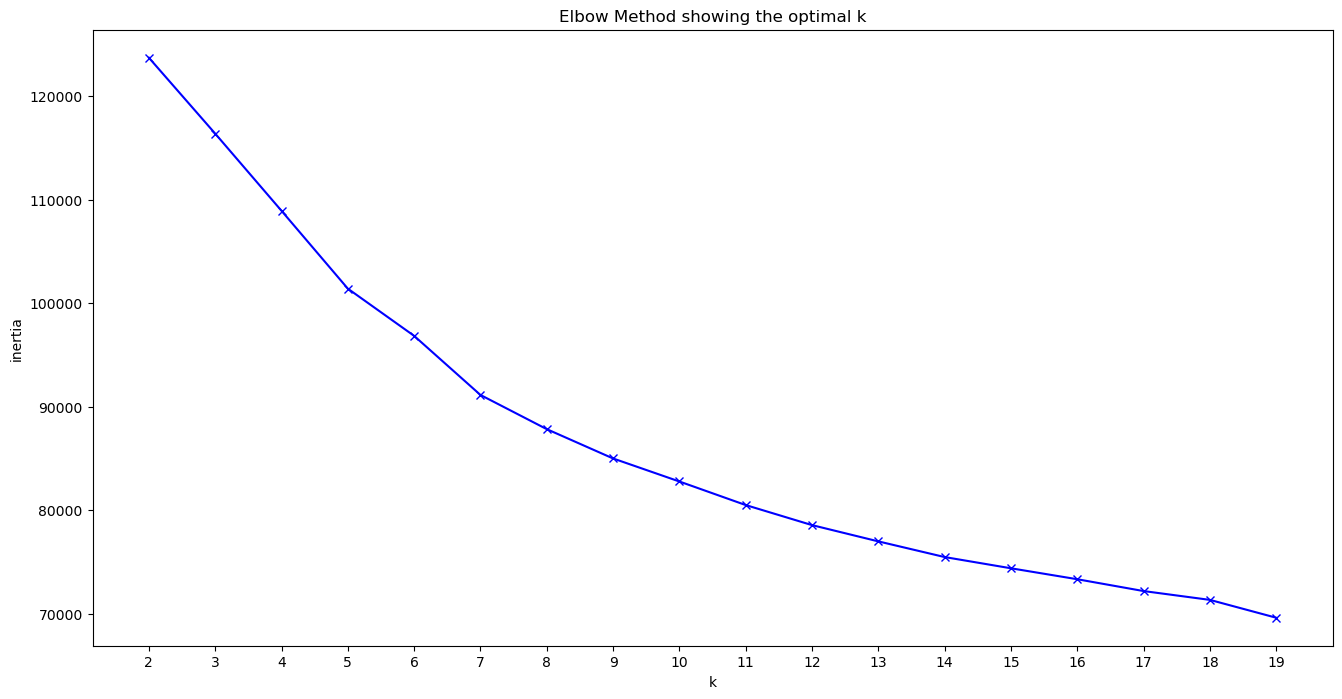

In [5]:
K = range(2, 20)
inertia = []
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)
    predictions=kmeans.predict(X_prep)
    silhouette.append(silhouette_score(X_prep, predictions))

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

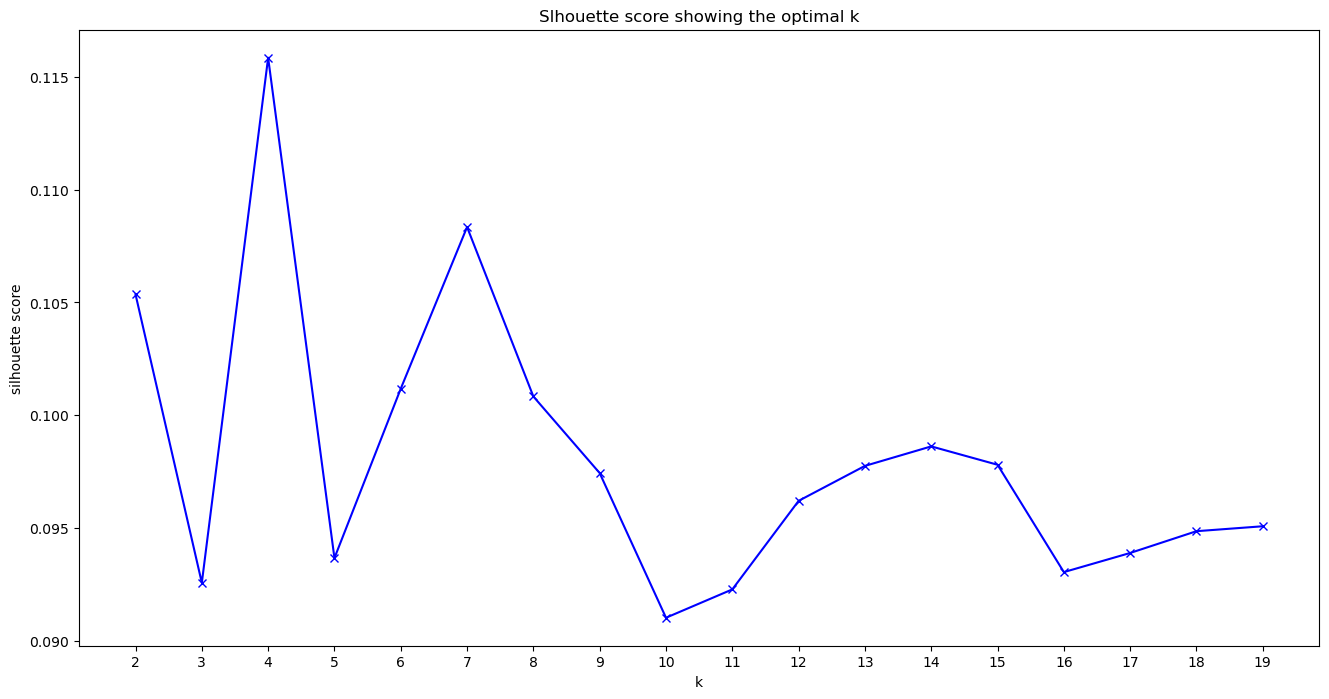

In [6]:
plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

In [7]:
# Train a KMeans clustering model
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(X_prep)

C:\Users\SIWAR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7, random_state=42)

In [8]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(X_prep)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()
df['predictions'] = clusters

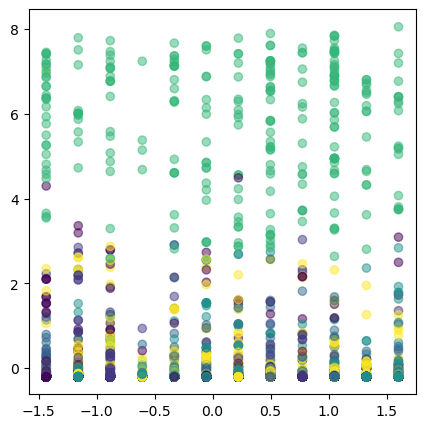

In [9]:
plt.figure(figsize=(5, 5))
plt.scatter(X_prep[:, 2], X_prep[:, 7], c=clusters,alpha=0.5)
plt.show()

In [10]:
kmeans.inertia_ 

92069.2247276926

In [11]:
secrets_file = open("secrets.txt","r")
string = secrets_file.read()
string.split('\n')
secrets_dict={}
for line in string.split('\n'):
    if len(line) > 0:
        #print(line.split(':'))
        secrets_dict[line.split(':')[0]]=line.split(':')[1].strip()
#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['clientid'],
                                                           client_secret=secrets_dict['clientsecret']))

In [12]:
def recommended_song_fct(song_name):
    # Search for the song on Spotify
    results = sp.search(q='track:' + song_name, type='track')
    # Check if any results were found
    if len(results['tracks']['items']) == 0:
        print("Sorry, the song was not found on Spotify.")
        return None 
    # Extract the first track found (assumes top result is the desired song)
    track = results['tracks']['items'][0]
    song_id = track['id']
   
    # Get the audio features of the song
    audio_features_list = []
    audio_features_list = audio_features_list + sp.audio_features(song_id)
    sleep(randint(1, 3))  # Sleep for a random duration to avoid rate limiting
    
    # Convert the list of dictionaries to a DataFrame
    audio_features_df = json_normalize(audio_features_list)
  
    #Extract relevant numerical features
    numericals = audio_features_df.select_dtypes(np.number)
    
    # Scale the features
    X = scaler.transform(numericals)
    # Predict the cluster
    cluster = kmeans.predict(X)
    # Filter the dataset to include only songs from the predicted cluster
    songs_in_cluster = df[df['predictions'] == cluster[0]] # Use cluster[0] to extract the cluster number
    # Recommend a song from the cluster (e.g., randomly select one)
    recommended_song = songs_in_cluster.sample(1)['song_name'].values[0]
    return recommended_song

def open_song(song_name):
    # Search for the song on Spotify
    results = sp.search(q='track:' + song_name, type='track', limit=1)
    # Check if any results were found
    if len(results['tracks']['items']) == 0:
        print("Sorry, the song was not found on Spotify.")
        return
    # Extract the first track found (assumes top result is the desired song)
    track = results['tracks']['items'][0]
    # Get the URI of the track
    track_uri = track['uri']
    # Construct the URL for the Spotify web player with the track URI
    web_player_url = 'https://open.spotify.com/track/' + track_uri.split(':')[-1]
    # Open the song in the default web browser
    webbrowser.open(web_player_url)

In [13]:
# Ask the user to enter the name of a song
song_name = input("Please enter the name of a song you like: ")
# Convert the song name to lowercase
lower_song_name = song_name.lower()

# Check if the entered song is in the DataFrame
if df2['Title'].str.lower().isin([lower_song_name]).any():
    # Filter out the entered song from the repertoire
    recommended_songs = df2.loc[df2['Title'].str.lower() != lower_song_name, 'Title']
    
    # Randomly select one song from the recommended songs list
    recommended_song = random.choice(recommended_songs.tolist())
    
    print("We recommend you this song:", recommended_song)
    open_song(recommended_song)
else:
    recommended_song2= recommended_song_fct(song_name)
    print("We recommend you this song:", recommended_song2)
    open_song(recommended_song2)


Please enter the name of a song you like:  Despacito


We recommend you this song: Wake & Bake (feat. IAMSU!, Berner)
